<a href="https://colab.research.google.com/github/venkatesh-gorrela/projects_5/blob/main/titanic_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
file_path ="/content/file.csv"


In [ ]:
dataset_path = "/content/train.csv"

In [ ]:
titanic_df = pd.read_csv(dataset_path)

In [ ]:
titanic_df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

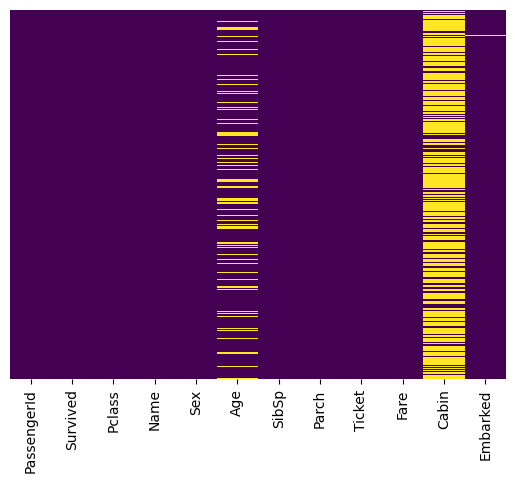

In [ ]:
sns.heatmap(titanic_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
# Calculate the median age of the passengers
median_age = titanic_df["Age"].median()
median_aged=int(median_age)
median_aged

28

In [ ]:
titanic_df["Age"]=titanic_df["Age"].fillna(value=28)
titanic_df["Age"] = titanic_df["Age"].astype(int)
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C


In [ ]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

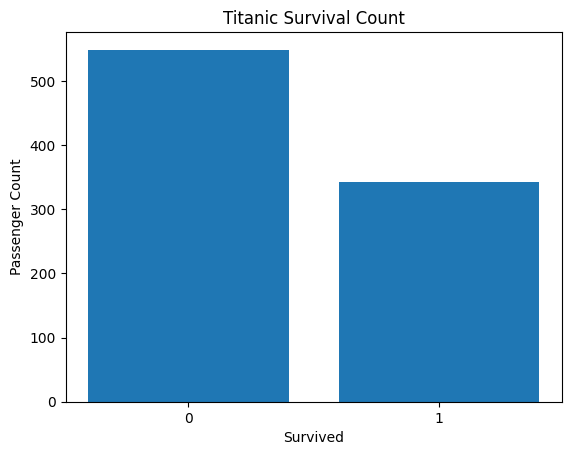

In [ ]:
survival_count =titanic_df.groupby("Survived")["PassengerId"].count()
# surived=1,not survived=0
# Create a bar plot to visualize the counts
plt.bar(survival_count.index, survival_count.values)
plt.xlabel("Survived")
plt.ylabel("Passenger Count")
plt.xticks([0, 1])
plt.title("Titanic Survival Count")
plt.show()

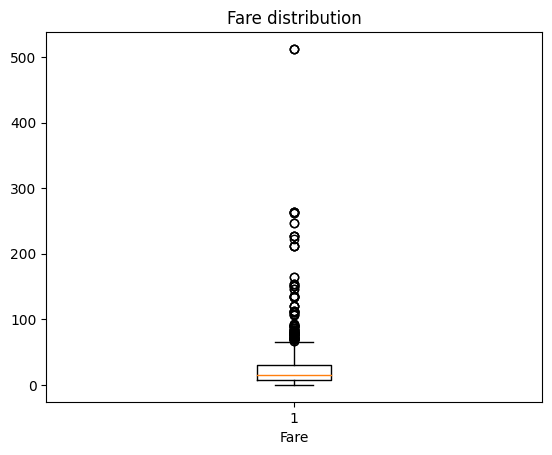

In [ ]:
# Visualize the distribution of the "Fare" variable using a box plot
plt.boxplot(titanic_df["Fare"])
plt.xlabel("Fare")
plt.title("Fare distribution")
plt.show()

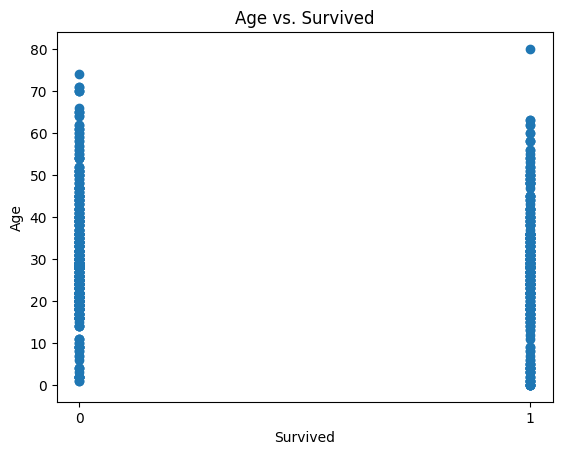

In [ ]:
# Visualize the relationship between "Age" and "Surrvived" using a scatter plot
plt.scatter(titanic_df["Survived"], titanic_df["Age"])
plt.xlabel("Survived")
plt.xticks([0, 1])
plt.ylabel("Age")
plt.title("Age vs. Survived")
plt.show()


<ipython-input-18-ec4143ce6e9e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = titanic_df.corr()


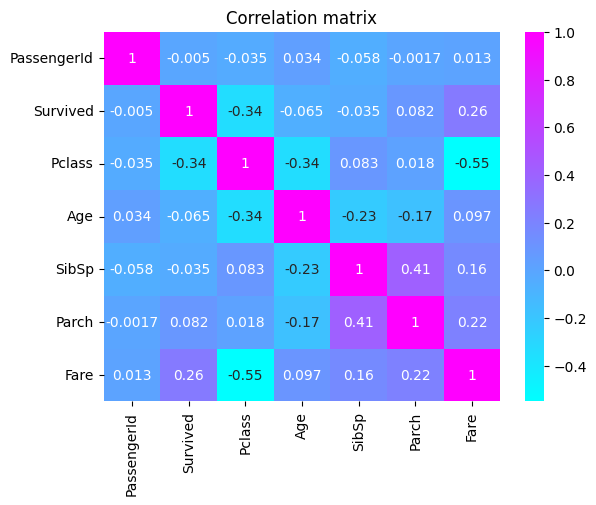

In [ ]:
# Create a heatmap to visualize the correlation between variables
corr_matrix = titanic_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="cool")
plt.title("Correlation matrix")
plt.show()

In [ ]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:

# Map "Sex" column to binary values
titanic_df["Sex_binary"] = titanic_df["Sex"].map({"male": 1, "female": 0})

# Print the new "Sex_binary" column
print(titanic_df["Sex_binary"])

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex_binary, Length: 891, dtype: int64


In [ ]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binary
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C,1


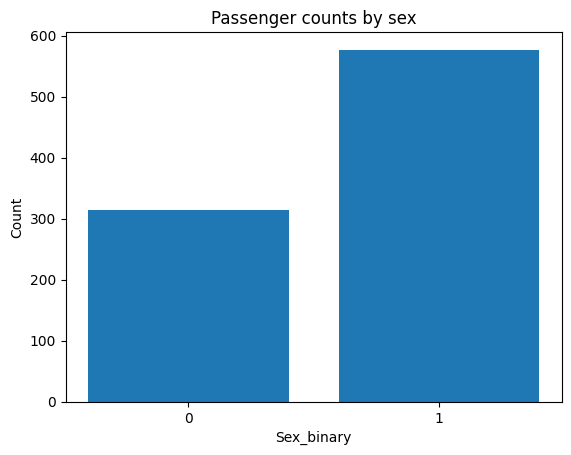

In [ ]:
# Use a bar plot to visualize the count of passengers by sex
sex_counts = titanic_df["Sex_binary"].value_counts()
plt.bar(sex_counts.index, sex_counts.values)
plt.xlabel("Sex_binary")
plt.xticks([0, 1])
plt.ylabel("Count")
plt.title("Passenger counts by sex")
plt.show()

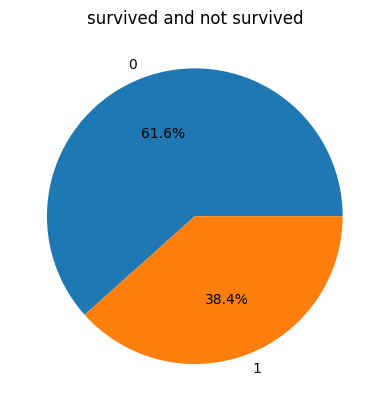

In [ ]:

# Use a pie chart to visualize the proportion of passengers by class
class_counts = titanic_df["Survived"].value_counts()
plt.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%')
plt.title("survived and not survived")
plt.show()

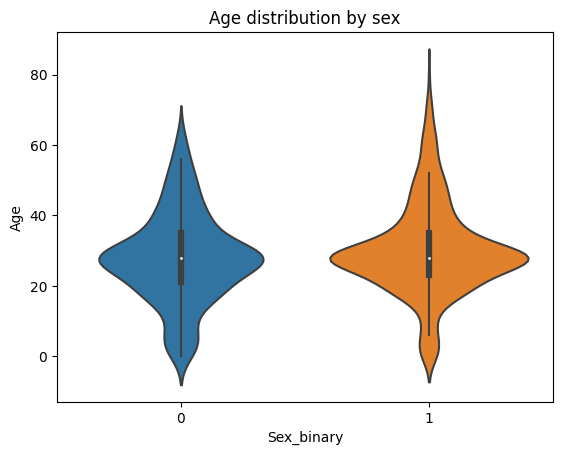

In [ ]:
# Use a violin plot to visualize the distribution of ages by sex
sns.violinplot(x=titanic_df["Sex_binary"], y=titanic_df["Age"])

plt.xlabel("Sex_binary")
plt.ylabel("Age")
plt.title("Age distribution by sex")
plt.show()

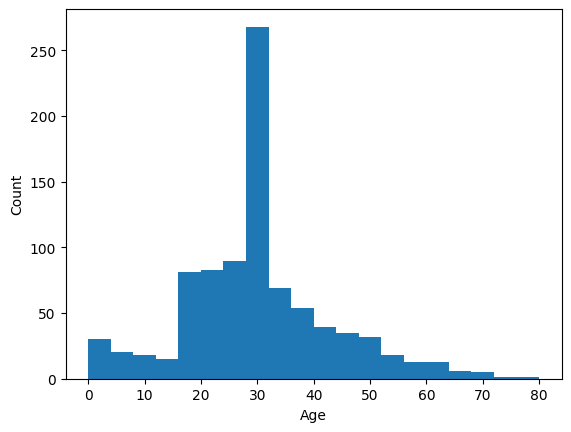

In [ ]:
# Example: create a histogram of the ages of passengers
plt.hist(titanic_df["Age"], bins=20)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [ ]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
gp=titanic_df.groupby('Survived')
gp['Embarked'].value_counts()

Survived  Embarked
0         S           427
          C            75
          Q            47
1         S           217
          C            93
          Q            30
Name: Embarked, dtype: int64

In [ ]:
titanic_df['Embarked']=titanic_df['Embarked'].fillna(value='S')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binary
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C,1


<ipython-input-32-5907b898e39c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic_df.corr(), annot=True, fmt='.0%')


<Axes: >

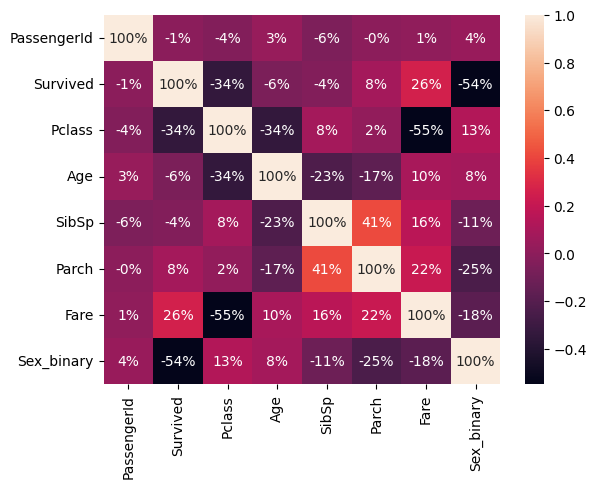

In [ ]:
sns.heatmap(titanic_df.corr(), annot=True, fmt='.0%')

<Axes: xlabel='Survived', ylabel='count'>

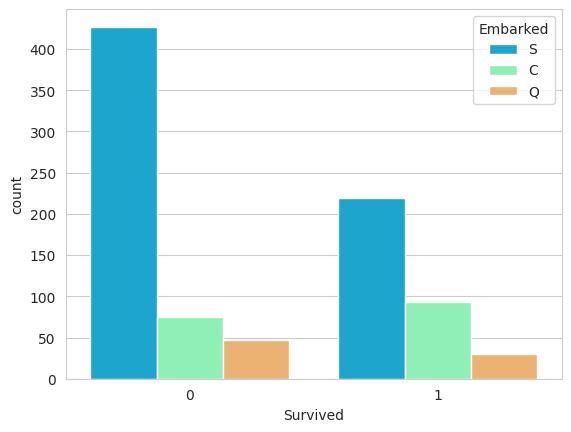

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Embarked',data=titanic_df,palette='rainbow')

<Axes: xlabel='Survived', ylabel='count'>

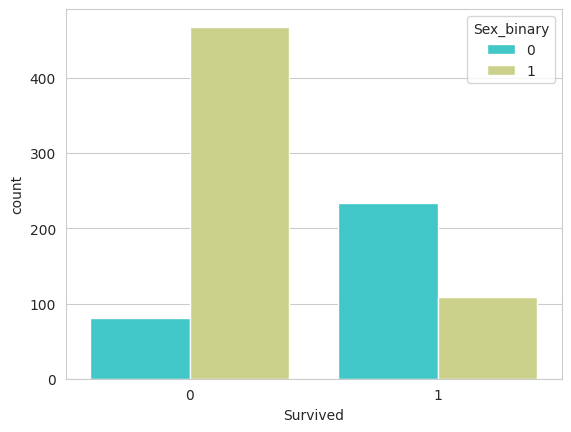

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex_binary',data=titanic_df,palette='rainbow')

In [ ]:
# Drop the "Cabin" column
titanic_df.drop("Cabin",axis=1,inplace=True)
titanic_df.drop("Ticket",axis=1,inplace=True)
titanic_df.drop("Sex",axis=1,inplace=True)
titanic_df.drop("Fare",axis=1,inplace=True)

# Print the result
print(titanic_df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Age  SibSp  Parch  \
0                              Braund, Mr. Owen Harris   22      1      0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...   38      1      0   
2                               Heikkinen, Miss. Laina   26      0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)   35      1      0   
4                             Allen, Mr. William Henry   35      0      0   
..                                                 ...  ...    ...    ...   
886 

In [ ]:
titanic_df.drop("PassengerId",axis=1,inplace=True)
titanic_df.drop("Name",axis=1,inplace=True)
titanic_df

,Survived,Pclass,Age,SibSp,Parch,Embarked,Sex_binary
0,0,3,22,1,0,S,1
1,1,1,38,1,0,C,0
2,1,3,26,0,0,S,0
3,1,1,35,1,0,S,0
4,0,3,35,0,0,S,1
...,...,...,...,...,...,...,...
886,0,2,27,0,0,S,1
887,1,1,19,0,0,S,0
888,0,3,28,1,2,S,0
889,1,1,26,0,0,C,1


In [ ]:
titanic_df.drop("Embarked",axis=1,inplace=True)
titanic_df

,Survived,Pclass,Age,SibSp,Parch,Sex_binary
0,0,3,22,1,0,1
1,1,1,38,1,0,0
2,1,3,26,0,0,0
3,1,1,35,1,0,0
4,0,3,35,0,0,1
...,...,...,...,...,...,...
886,0,2,27,0,0,1
887,1,1,19,0,0,0
888,0,3,28,1,2,0
889,1,1,26,0,0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(titanic_df.drop(['Survived'], axis=1), titanic_df['Survived'], test_size=0.2, random_state=42)
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8156424581005587
